In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid=pd.read_csv('Covid_19_report_us.csv')
covid.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [3]:
df=pd.DataFrame(data=covid)
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


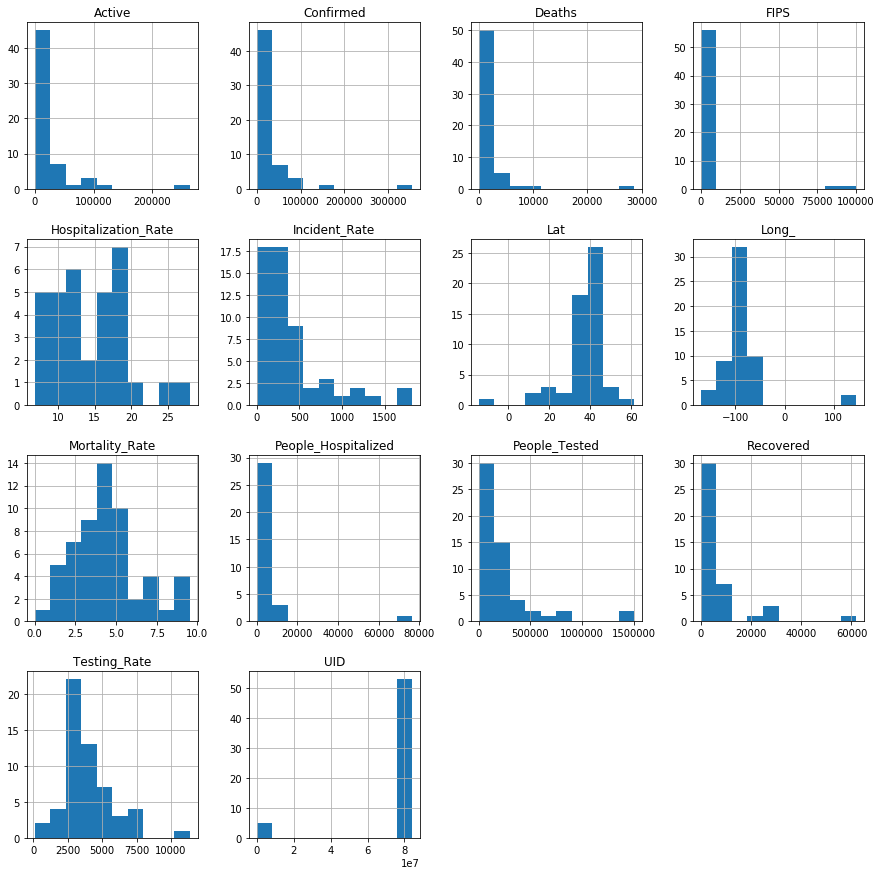

In [4]:
df.hist(figsize=(15,15))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x279b0961948>,
 'caps': [<matplotlib.lines.Line2D at 0x279b0961e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x279b0f1cf48>],
 'medians': [<matplotlib.lines.Line2D at 0x279b0964fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x279b0965fc8>],
 'means': []}

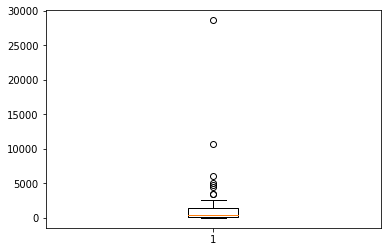

In [5]:
plt.boxplot(df['Deaths'])

{'whiskers': [<matplotlib.lines.Line2D at 0x279b09b6748>,
 'caps': [<matplotlib.lines.Line2D at 0x279b09a41c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x279b09b0e48>],
 'medians': [<matplotlib.lines.Line2D at 0x279b09bb788>],
 'fliers': [<matplotlib.lines.Line2D at 0x279b09be048>],
 'means': []}

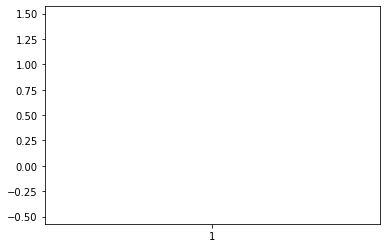

In [6]:
plt.boxplot(df['Incident_Rate'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x279b0a1f988>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x279b0a1f948>,
 'cmins': <matplotlib.collections.LineCollection at 0x279b0a29ac8>,
 'cbars': <matplotlib.collections.LineCollection at 0x279b0a1fcc8>}

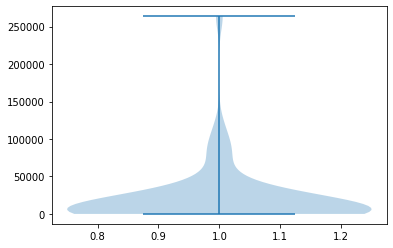

In [7]:
plt.violinplot(df['Active'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x279b0a90c08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x279b0a8b208>,
 'cmins': <matplotlib.collections.LineCollection at 0x279b0a96bc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x279b0a96b48>}

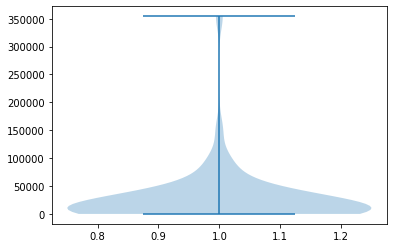

In [8]:
plt.violinplot(df['Confirmed'])

Text(0, 0.5, 'Deaths Case')

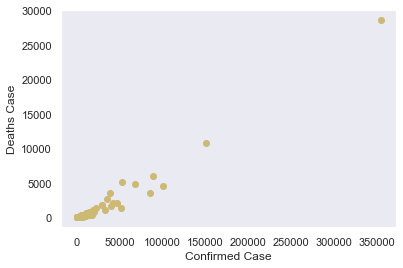

In [180]:
plt.scatter('Confirmed','Deaths',c='y',data=df)
plt.xlabel('Confirmed Case')
plt.ylabel('Deaths Case')

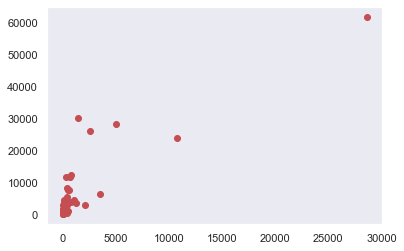

In [181]:
plt.scatter('Deaths','Recovered',c='r',data=df)

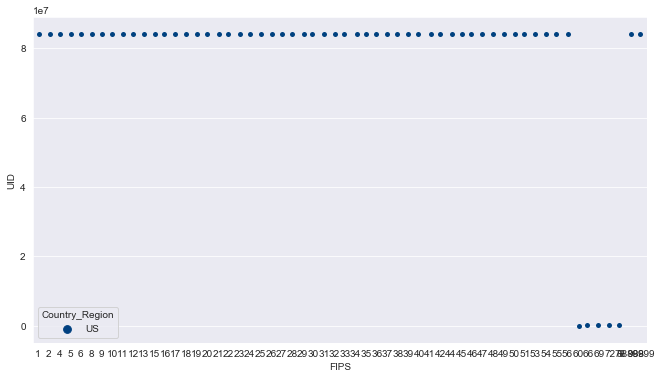

In [99]:
plt.figure(figsize=(11,6))
sns.stripplot('FIPS','UID',hue='Country_Region',palette='ocean',data=df)

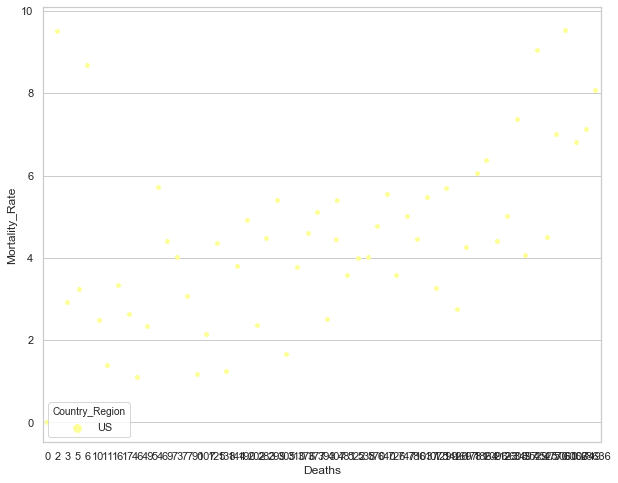

In [106]:
plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
sns.stripplot('Deaths','Mortality_Rate',hue='Country_Region',data=df,palette='terrain')

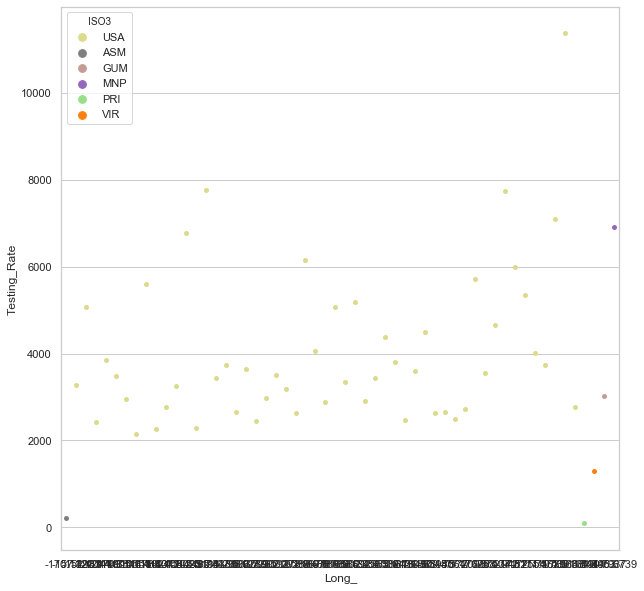

In [107]:
plt.figure(figsize=(10,10))
sns.swarmplot('Long_','Testing_Rate',hue='ISO3',data=df,palette='tab20_r')

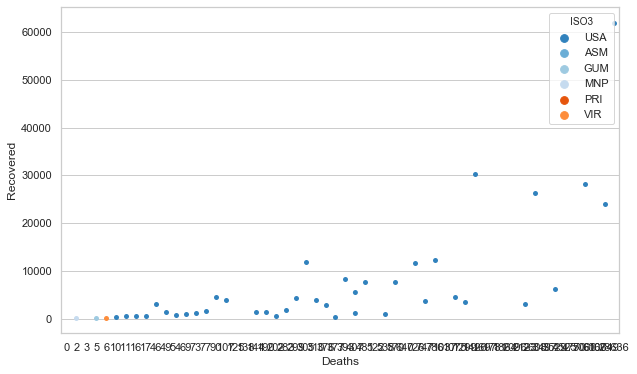

In [108]:
plt.figure(figsize=(10,6))
sns.swarmplot('Deaths','Recovered',hue='ISO3',data=df,palette='tab20c')

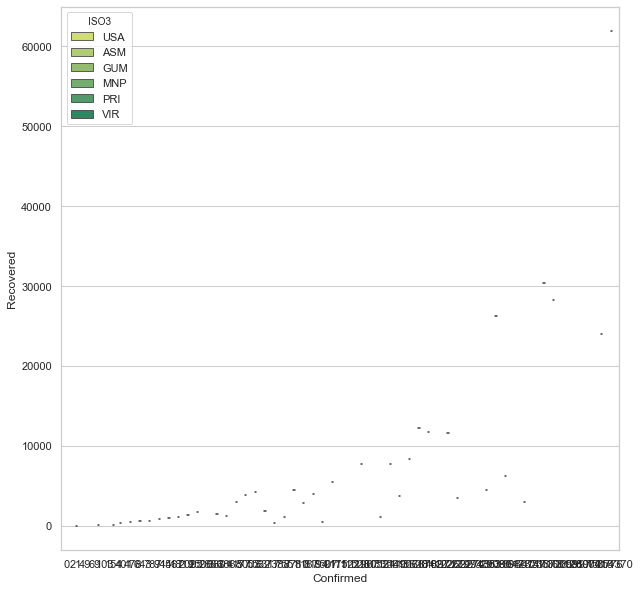

In [109]:
plt.figure(figsize=(10,10))
sns.violinplot('Confirmed','Recovered',hue='ISO3',data=df,palette='summer_r')

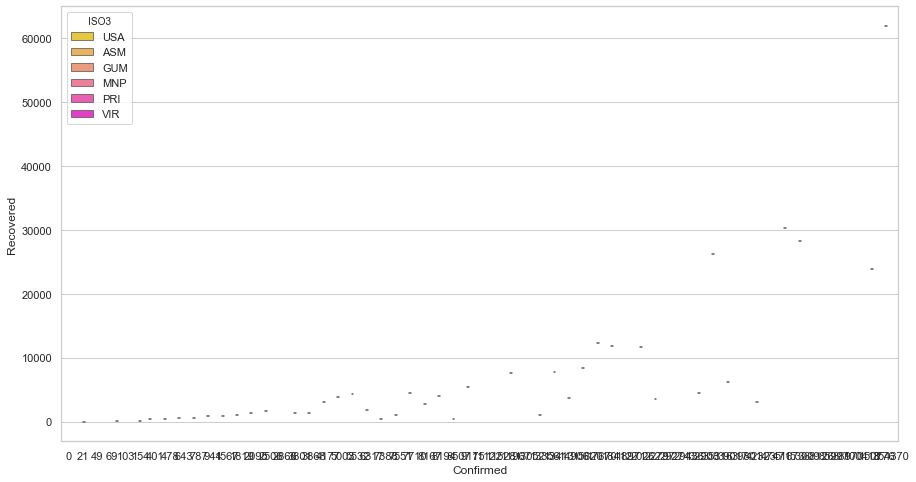

In [110]:
plt.figure(figsize=(15,8))
sns.violinplot('Confirmed','Recovered',hue='ISO3',cut=5,data=df,palette='spring_r',trim=True)

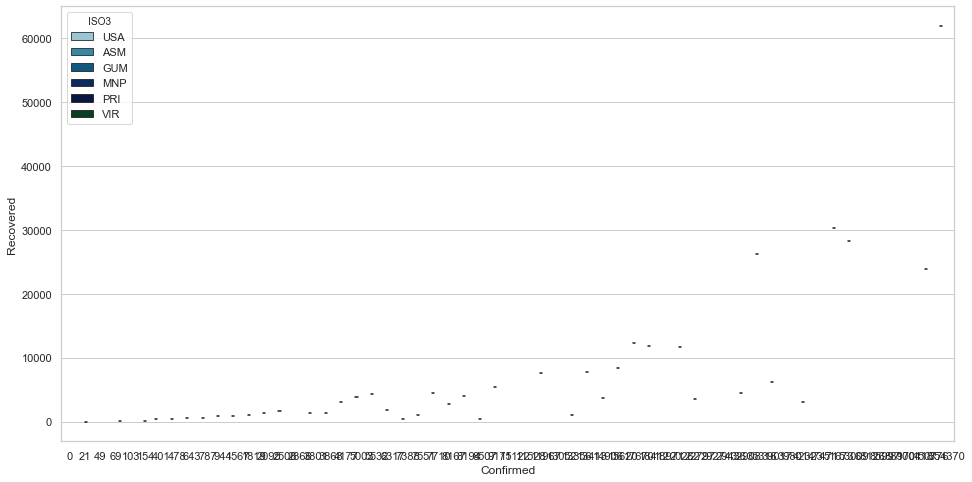

In [111]:
plt.figure(figsize=(16,8))
sns.violinplot('Confirmed','Recovered',hue='ISO3',cut=5,scale='count',data=df,palette='ocean_r',trim=True)

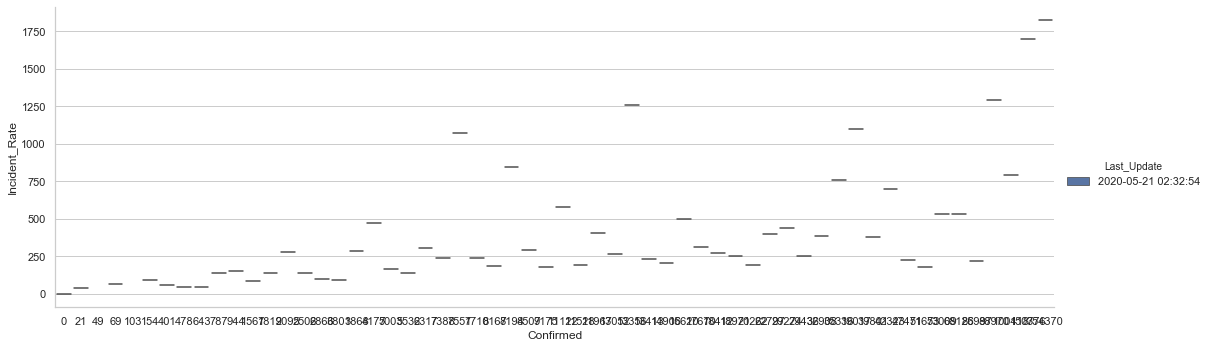

In [115]:
sns.catplot('Confirmed','Incident_Rate',hue='Last_Update',aspect=3,data=df,kind='violin')

<Figure size 720x720 with 0 Axes>

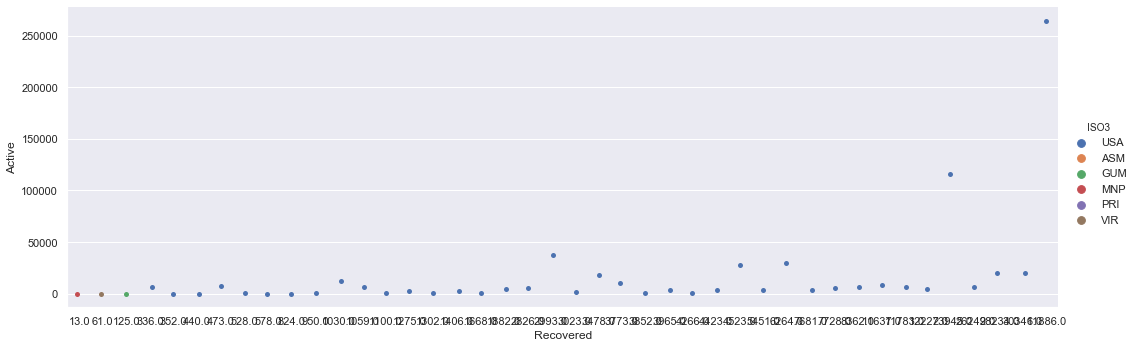

In [116]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.catplot('Recovered','Active',hue='ISO3',height=5,aspect=3,data=df,kind='strip')

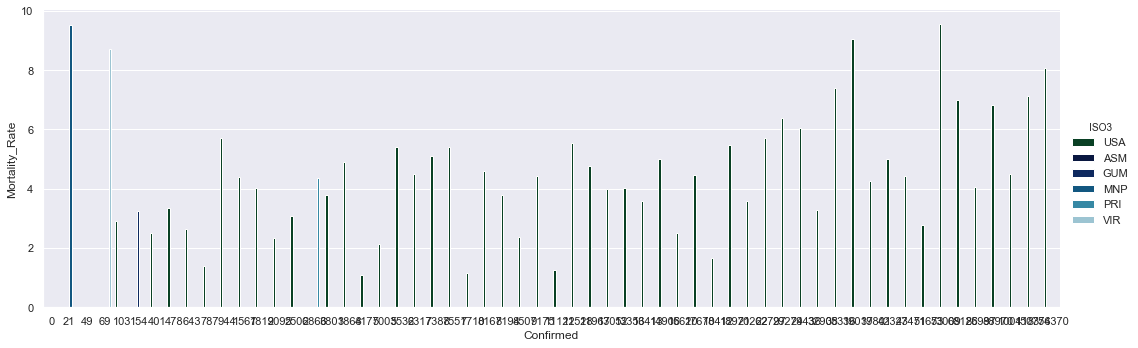

In [119]:
sns.catplot('Confirmed','Mortality_Rate',hue='ISO3',aspect=3,data=df,palette='ocean',kind='bar')

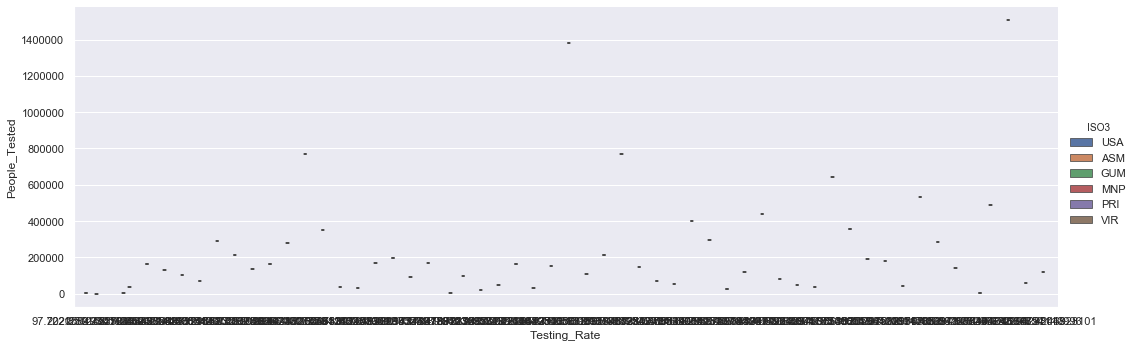

In [125]:
sns.catplot('Testing_Rate','People_Tested',hue='ISO3',height=5,aspect=3,data=df,kind='box')

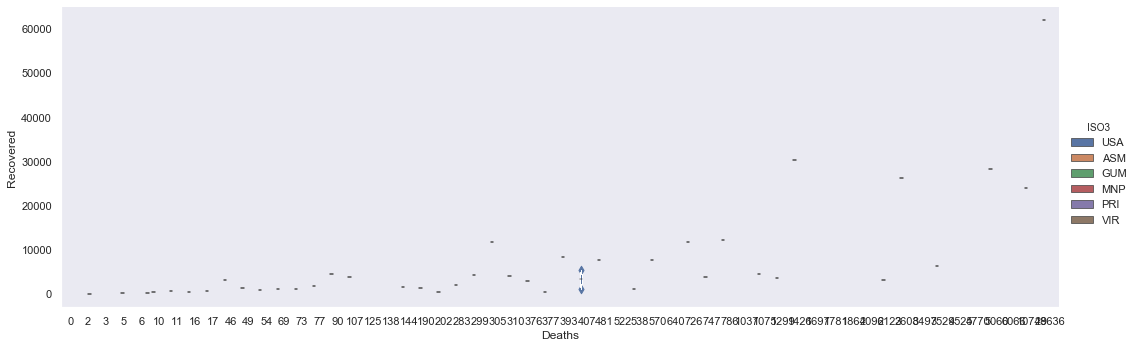

In [127]:
sns.set_style('dark')
sns.catplot('Deaths','Recovered',height=5,aspect=3,hue='ISO3',data=df,kind='boxen')

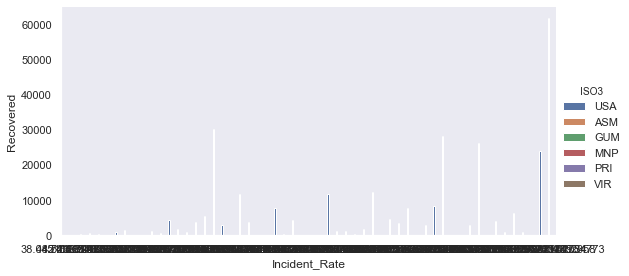

In [131]:
sns.set_style('dark')
sns.catplot('Incident_Rate','Recovered',height=4,aspect=2,hue='ISO3',data=df,kind='bar')

<Figure size 720x576 with 0 Axes>

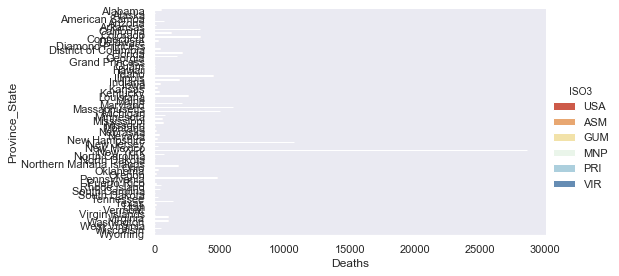

In [139]:
plt.figure(figsize=(10,8))
sns.catplot('Deaths','Province_State',hue='ISO3',height=4,aspect=2,data=df,kind='bar',palette='RdYlBu')

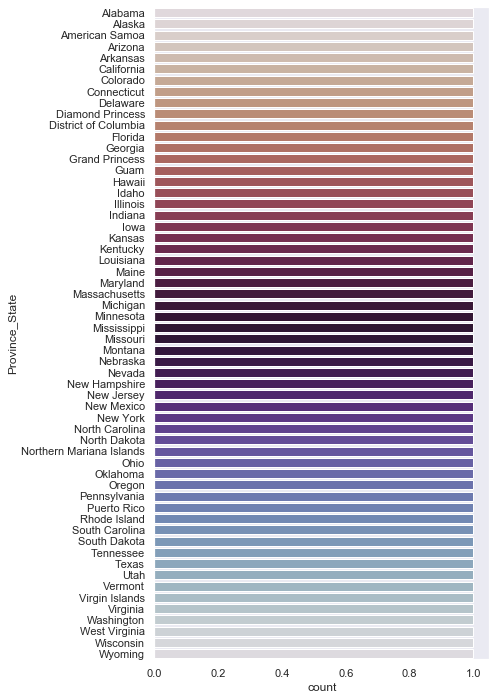

In [150]:
plt.figure(figsize=(6,12))
sns.countplot(y='Province_State',data=df,palette='twilight_r')

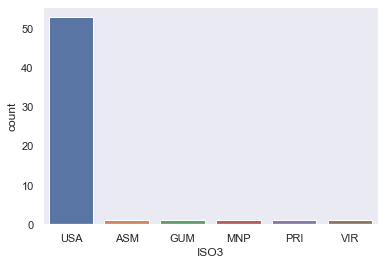

In [151]:
sns.countplot(df['ISO3'])

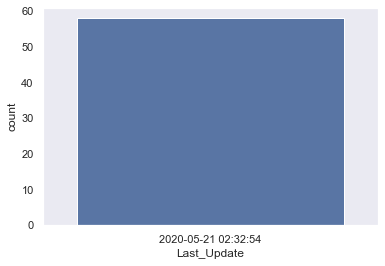

In [153]:
sns.countplot(df['Last_Update'])

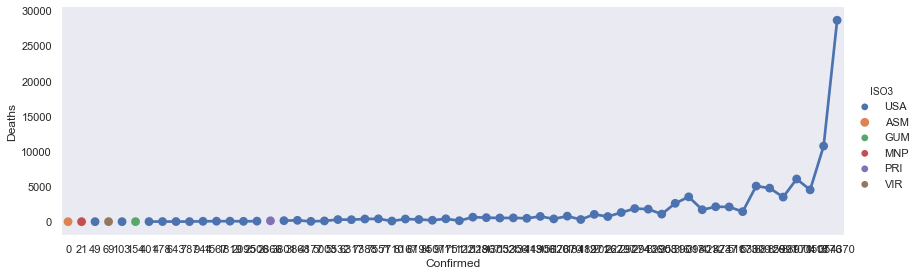

In [185]:
sns.catplot('Confirmed','Deaths',hue='ISO3',height=4,aspect=3,data=df,kind='point')

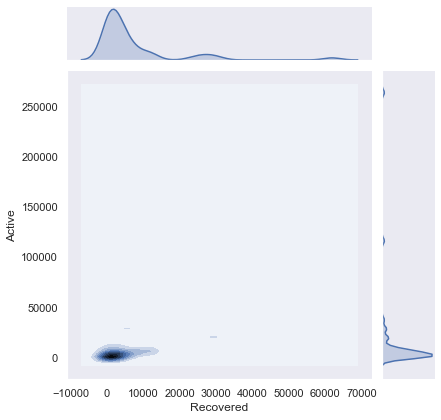

In [186]:
sns.jointplot('Recovered','Active',data=df,kind='kde')

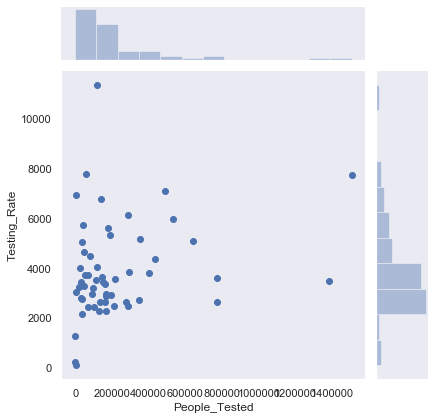

In [187]:
sns.jointplot('People_Tested','Testing_Rate',data=df)

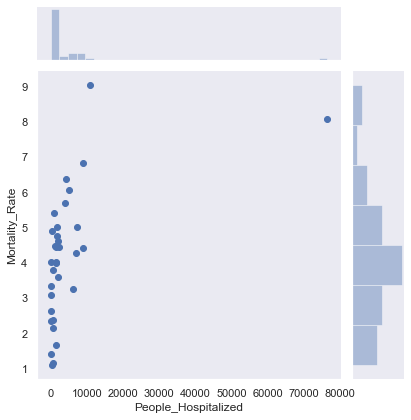

In [190]:
sns.jointplot('People_Hospitalized','Mortality_Rate',data=df,kind='scatter',height=6,ratio=5,space=0.2)

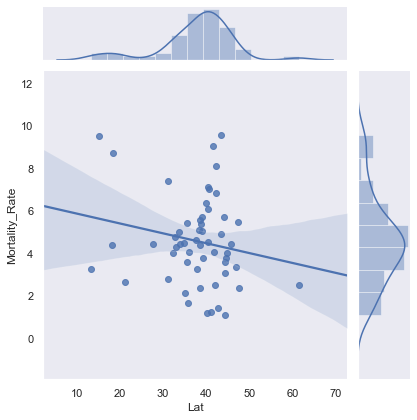

In [192]:
sns.jointplot('Lat','Mortality_Rate',data=df,kind='reg',height=6,ratio=5,space=0.2)

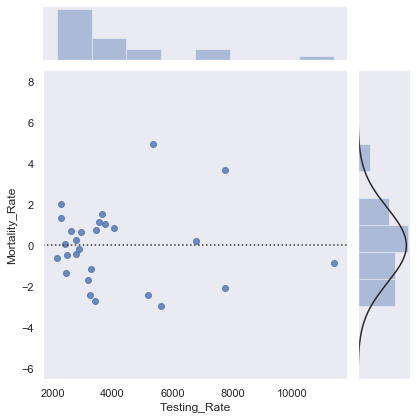

In [241]:
sns.jointplot('Testing_Rate','Mortality_Rate',data=df,kind='resid',height=6,ratio=5,space=0.2)

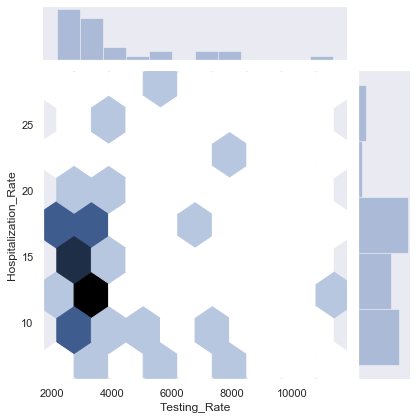

In [194]:
sns.jointplot('Testing_Rate','Hospitalization_Rate',data=df,kind='hex',height=6,ratio=5,space=0.2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
Province_State          58 non-null object
Country_Region          58 non-null object
Last_Update             58 non-null object
Lat                     56 non-null float64
Long_                   56 non-null float64
Confirmed               58 non-null int64
Deaths                  58 non-null int64
Recovered               42 non-null float64
Active                  58 non-null float64
FIPS                    58 non-null int64
Incident_Rate           56 non-null float64
People_Tested           56 non-null float64
People_Hospitalized     33 non-null float64
Mortality_Rate          57 non-null float64
UID                     58 non-null int64
ISO3                    58 non-null object
Testing_Rate            56 non-null float64
Hospitalization_Rate    33 non-null float64
dtypes: float64(10), int64(4), object(4)
memory usage: 8.3+ KB


In [10]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [11]:
df.shape

(58, 18)

In [12]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [13]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

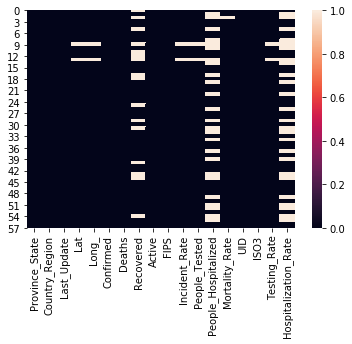

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Confirmed', 'Deaths', 'FIPS', 'UID'], dtype='object'),
 dtype('float64'): Index(['Lat', 'Long_', 'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
        'People_Hospitalized', 'Mortality_Rate', 'Testing_Rate',
        'Hospitalization_Rate'],
       dtype='object'),
 dtype('O'): Index(['Province_State', 'Country_Region', 'Last_Update', 'ISO3'], dtype='object')}

In [16]:
df.dropna(axis=0,how='any',inplace=True)

In [17]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [18]:
df.shape

(27, 18)

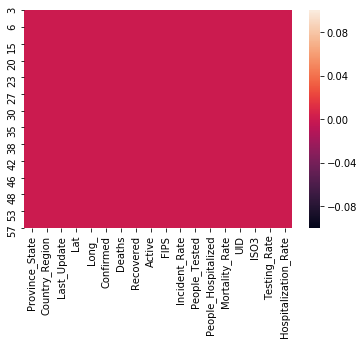

In [19]:
sns.heatmap(df.isnull())

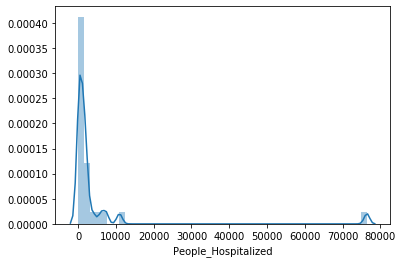

In [20]:
sns.distplot(df['People_Hospitalized'])

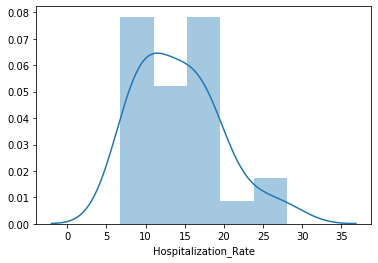

In [21]:
sns.distplot(df['Hospitalization_Rate'])

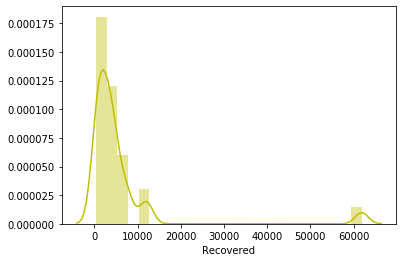

In [22]:
sns.distplot(df['Recovered'],color='y')

In [23]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Confirmed', 'Deaths', 'FIPS', 'UID'], dtype='object'),
 dtype('float64'): Index(['Lat', 'Long_', 'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
        'People_Hospitalized', 'Mortality_Rate', 'Testing_Rate',
        'Hospitalization_Rate'],
       dtype='object'),
 dtype('O'): Index(['Province_State', 'Country_Region', 'Last_Update', 'ISO3'], dtype='object')}

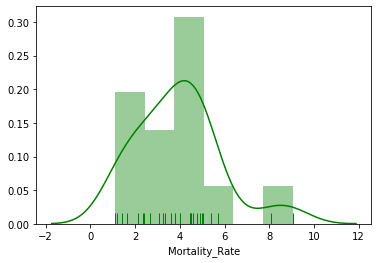

In [24]:
sns.distplot(df['Mortality_Rate'],rug=True,color='g')

In [25]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01,27.000000,27.000000,2.700000e+01,27.000000,27.000000
mean,39.579870,-95.279459,24137.925926,1573.185185,5846.629630,16718.111111,31.333333,377.854090,1.736362e+05,4651.777778,3.919288,8.400003e+07,4056.088215,14.168048
std,5.719976,19.562585,66961.033471,5462.200733,11641.005515,50332.706229,15.568706,405.143373,2.766633e+05,14561.282048,1.887983,1.556871e+01,2170.885215,5.346878
min,21.094300,-157.498300,478.000000,11.000000,440.000000,22.000000,4.000000,44.723974,1.884000e+04,65.000000,1.101269,8.400000e+07,2158.119598,6.778043
25%,35.656550,-106.775500,3834.500000,83.500000,1288.500000,1005.500000,20.500000,153.006366,5.504400e+04,358.000000,2.509186,8.400002e+07,2697.895652,9.652277
50%,40.150000,-93.900200,8167.000000,299.000000,3023.000000,3716.000000,33.000000,269.608008,1.318370e+05,1139.000000,4.013194,8.400003e+07,3270.352122,13.061686
75%,44.254500,-79.557500,16288.000000,658.500000,4987.000000,9109.000000,44.500000,390.704998,1.675255e+05,2085.500000,4.837599,8.400004e+07,4619.368934,17.408409
max,47.528900,-69.381900,354370.000000,28636.000000,61886.000000,263848.000000,56.000000,1821.620216,1.505836e+06,76410.000000,9.044775,8.400006e+07,11377.424693,28.054438


In [26]:
df['Province_State'].unique()

array(['Arizona', 'Arkansas', 'Colorado', 'Connecticut', 'Hawaii',
       'Idaho', 'Kansas', 'Kentucky', 'Maine', 'Maryland', 'Minnesota',
       'Mississippi', 'Montana', 'New Hampshire', 'New Mexico',
       'New York', 'North Dakota', 'Oklahoma', 'Oregon', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Utah', 'Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [27]:
df['ISO3'].unique()

array(['USA'], dtype=object)

In [28]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
15,Hawaii,US,2020-05-21 02:32:54,21.0943,-157.4983,643,17,578.0,48.0,15,45.413710,46304.0,82.0,2.643857,84000015,USA,3270.352122,12.752722


In [29]:
import datetime as dt

In [30]:
df['Last_Update']=pd.to_datetime(df['Last_Update'])

In [31]:
df['Last_Update']=df['Last_Update'].map(dt.datetime.toordinal)
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
48,Tennessee,US,737566,35.7478,-86.6923,18412,305,11783.0,6324.0,47,269.608008,354013.0,1515.0,1.656528,84000047,USA,5183.833360,8.228329
50,Utah,US,737566,40.1500,-111.8624,7710,90,4423.0,3197.0,49,240.489738,179664.0,631.0,1.167315,84000049,USA,5604.065930,8.184176
53,Virginia,US,737566,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
56,Wisconsin,US,737566,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,737566,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


In [32]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update               int64
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [33]:
region=pd.get_dummies(df['Country_Region'],drop_first=True)
iso=pd.get_dummies(df['ISO3'],drop_first=True)

In [34]:
df.drop(['Country_Region','ISO3'],axis=1,inplace=True)

In [35]:
df.head()

,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
3,Arizona,737566,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,2272.859351,12.022005
4,Arkansas,737566,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,3189.670370,10.693584
6,Colorado,737566,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,2289.339188,17.348774
7,Connecticut,737566,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,5349.302875,28.054438
15,Hawaii,737566,21.0943,-157.4983,643,17,578.0,48.0,15,45.413710,46304.0,82.0,2.643857,84000015,3270.352122,12.752722


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()

In [38]:
df['Province_State']=le.fit_transform(df['Province_State'])
df.head()

,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
3,0,737566,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,2272.859351,12.022005
4,1,737566,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,3189.670370,10.693584
6,2,737566,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,2289.339188,17.348774
7,3,737566,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,5349.302875,28.054438
15,4,737566,21.0943,-157.4983,643,17,578.0,48.0,15,45.413710,46304.0,82.0,2.643857,84000015,3270.352122,12.752722


In [39]:
df.skew()

Province_State          0.000000
Last_Update             0.000000
Lat                    -1.230671
Long_                  -1.127641
Confirmed               4.965014
Deaths                  5.040241
Recovered               4.611075
Active                  4.901087
FIPS                   -0.210950
Incident_Rate           2.440177
People_Tested           4.605481
People_Hospitalized     4.958128
Mortality_Rate          0.822856
UID                    -0.210950
Testing_Rate            1.942515
Hospitalization_Rate    0.790119
dtype: float64

Province_State              AxesSubplot(0.125,0.71587;0.133621x0.16413)
Last_Update              AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Lat                       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Long_                    AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Confirmed                AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Deaths                     AxesSubplot(0.125,0.518913;0.133621x0.16413)
Recovered               AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Active                   AxesSubplot(0.44569,0.518913;0.133621x0.16413)
FIPS                    AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Incident_Rate           AxesSubplot(0.766379,0.518913;0.133621x0.16413)
People_Tested              AxesSubplot(0.125,0.321957;0.133621x0.16413)
People_Hospitalized     AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Mortality_Rate           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
UID                     AxesSubplot(0.606034,0.321957;0.133621x0

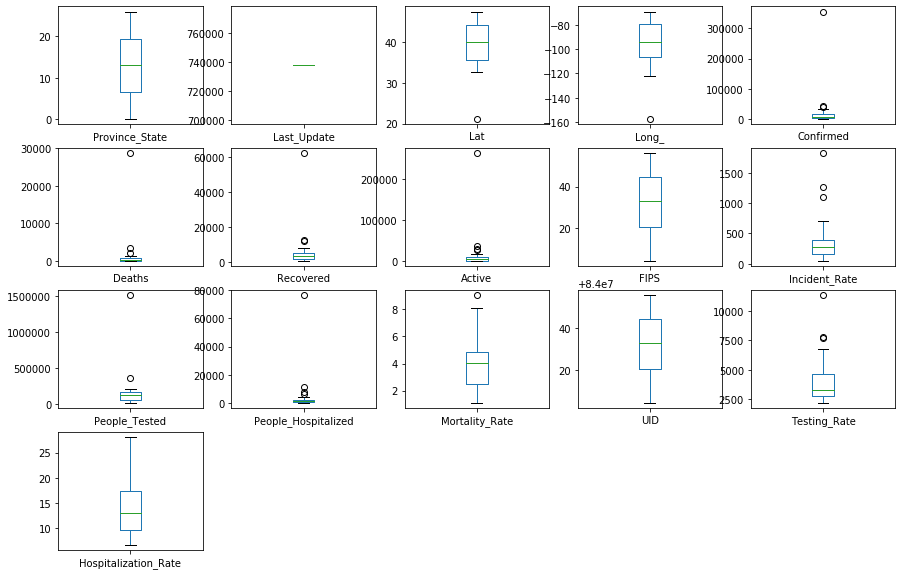

In [40]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

In [41]:
df.shape

(27, 16)

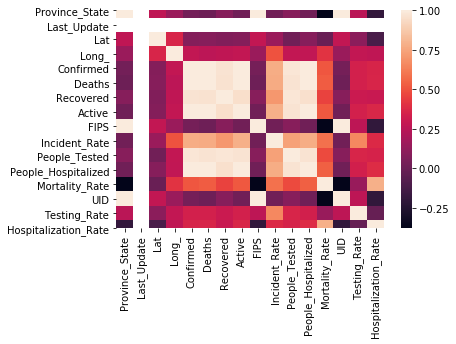

In [42]:
sns.heatmap(df.corr())

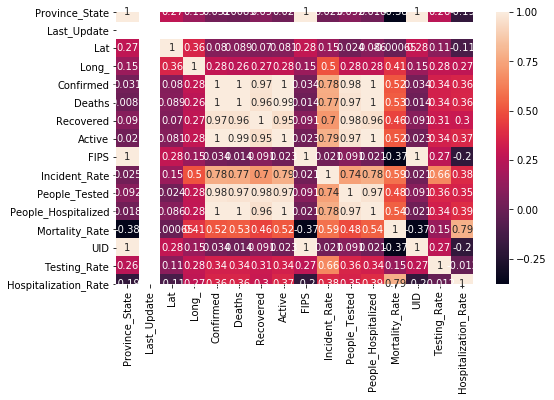

In [43]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

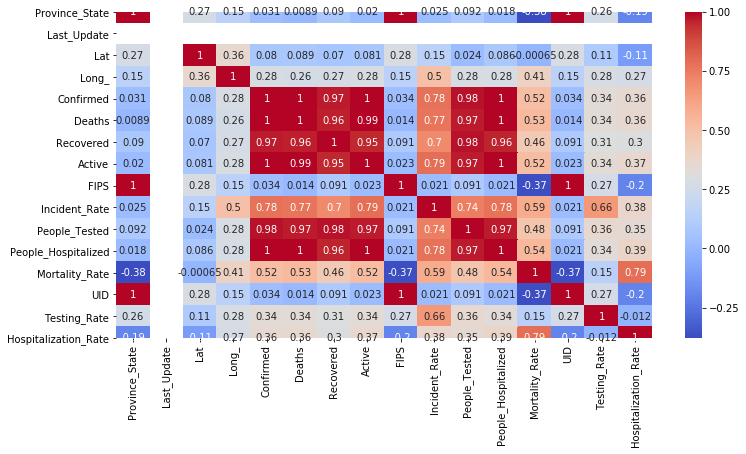

In [44]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [45]:
df=pd.concat([df,region,iso],axis=1)
df.head()

,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
3,0,737566,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,2272.859351,12.022005
4,1,737566,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,3189.670370,10.693584
6,2,737566,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,2289.339188,17.348774
7,3,737566,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,5349.302875,28.054438
15,4,737566,21.0943,-157.4983,643,17,578.0,48.0,15,45.413710,46304.0,82.0,2.643857,84000015,3270.352122,12.752722


In [46]:
x=df.drop('Deaths',axis=1)
x

,Province_State,Last_Update,Lat,Long_,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
3,0,737566,33.7298,-111.4312,14906,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,2272.859351,12.022005
4,1,737566,34.9697,-92.3731,5003,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,3189.670370,10.693584
6,2,737566,39.0598,-105.3111,22797,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,2289.339188,17.348774
7,3,737566,41.5978,-72.7554,39017,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,5349.302875,28.054438
15,4,737566,21.0943,-157.4983,643,578.0,48.0,15,45.413710,46304.0,82.0,2.643857,84000015,3270.352122,12.752722
16,5,737566,44.2405,-114.4788,2506,1668.0,761.0,16,140.229930,38567.0,215.0,3.072626,84000016,2158.119598,8.579409
20,6,737566,38.5266,-96.7265,8507,473.0,7832.0,20,292.004226,71203.0,760.0,2.374515,84000020,2444.055121,8.933819
21,7,737566,37.6681,-84.6701,8167,2826.0,4965.0,21,182.802099,153986.0,2010.0,4.603894,84000021,3446.671231,24.611240
23,8,737566,44.6939,-69.3819,1819,1100.0,646.0,23,135.320917,37269.0,231.0,4.013194,84000023,2772.553734,12.699285
24,9,737566,39.0639,-76.8021,42323,2993.0,37207.0,24,700.053592,215330.0,7393.0,5.016185,84000024,3561.716796,17.468043


In [47]:
y=df['Deaths']
y

3       747
4       107
6      1299
7      3529
15       17
16       77
20      202
21      376
23       73
24     2123
27      786
28      570
30       16
33      190
35      283
36    28636
38       49
41      299
42      144
45      538
46      407
47       46
48      305
50       90
53     1075
56      481
57       11
Name: Deaths, dtype: int64

In [48]:
models=[LinearRegression(),LogisticRegression(),KNeighborsRegressor(),GaussianNB()]

In [49]:
max_r2_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        r2_value=r2_score(y_test,predm)
        print('R2 score correspond to random state ',r_state,'is:',r2_value)
        if r2_value>max_r2_score:
            max_r2_score=r2_value
            final_state=r_state
            final_models=m
            
print()

print()

print()

print()

print('Maximum R2 score correspond to random state',final_state,'is',max_r2_score,'and models is',final_models)

R2 score correspond to random state  40 is: 1.0
R2 score correspond to random state  40 is: -0.06371246694233923
R2 score correspond to random state  40 is: -0.11970795078149177
R2 score correspond to random state  40 is: -0.21370443066204947
R2 score correspond to random state  41 is: 1.0
R2 score correspond to random state  41 is: -0.04997845067507489
R2 score correspond to random state  41 is: -0.10605552990344247
R2 score correspond to random state  41 is: -0.198839133903844
R2 score correspond to random state  42 is: 1.0
R2 score correspond to random state  42 is: 0.5903409684319362
R2 score correspond to random state  42 is: 0.6767409565267231
R2 score correspond to random state  42 is: 0.6114859857362821
R2 score correspond to random state  43 is: 1.0
R2 score correspond to random state  43 is: -2.2935162497248918
R2 score correspond to random state  43 is: 0.4597725436767034
R2 score correspond to random state  43 is: 0.6534454028108199
R2 score correspond to random state  44 i

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=40)

In [51]:
ln=LinearRegression()
ln.fit(x_train,y_train)
ln.score(x_train,y_train)
predln=ln.predict(x_test)
r2_sc=r2_score(y_test,predln)
print('R2 score:',r2_sc*100)
print('Mean squared error:',mean_squared_error(y_test,predln))
print('Mean absolute error:',mean_absolute_error(y_test,predln))
print('Mean square root:',np.sqrt(mean_absolute_error(y_test,predln)))

R2 score: 100.0
Mean squared error: 2.364633644418255e-21
Mean absolute error: 2.6678511252005894e-11
Mean square root: 5.165124514666214e-06


In [53]:
score=cross_val_score(ln,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[1. 1. 1. 1. 1.]
1.0
0.0


Text(0, 0.5, 'Predicted value of Y')

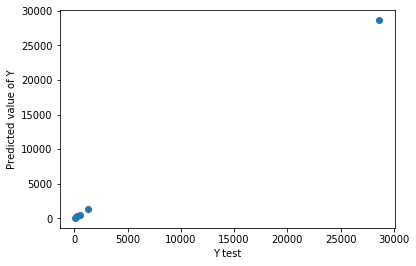

In [54]:
plt.scatter(y_test,predln)
plt.xlabel('Y test')
plt.ylabel('Predicted value of Y')

In [55]:
from sklearn.externals import joblib

In [56]:
joblib.dump(ln,'covid19USfile.obj')

['covid19USfile.obj']